In [19]:
# Import library
import pandas as pd

# Import dataset
diabetes_df = pd.read_csv('Downloads/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
# Checking for missing data
# The dataset is clear of any nulls or missing values

diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

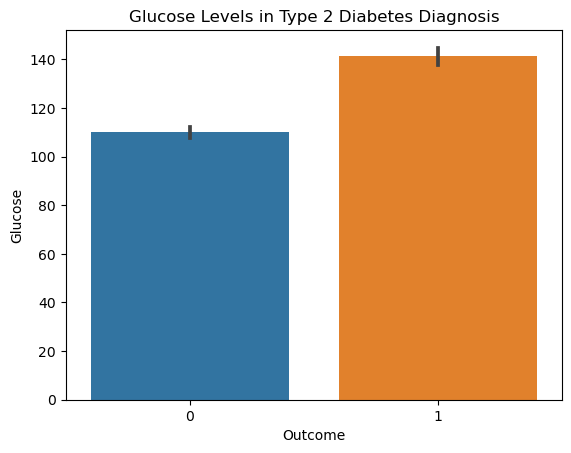

In [3]:
# First I want to evaluate the glucose levels needed for diabete diagnosis

# Import library
import seaborn as sns
import matplotlib.pyplot as plt

# Using a barplot to compare glucose levels and diabetes diagnosis

sns.barplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.title('Glucose Levels in Type 2 Diabetes Diagnosis')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

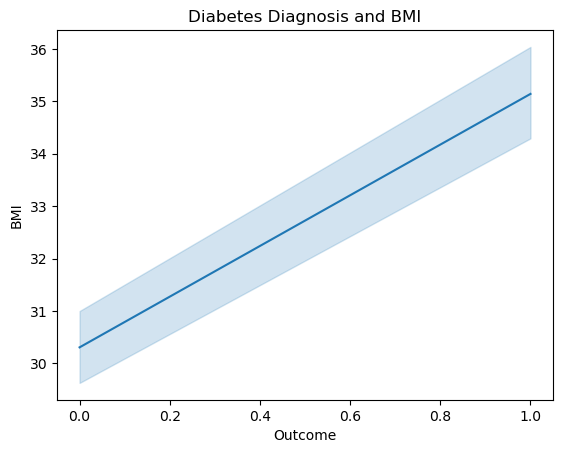

In [4]:
# Comparing BMI and outcome for diabetes diagnosis with a line plot

sns.lineplot(x='Outcome', y='BMI', data=diabetes_df)
plt.title('Diabetes Diagnosis and BMI')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

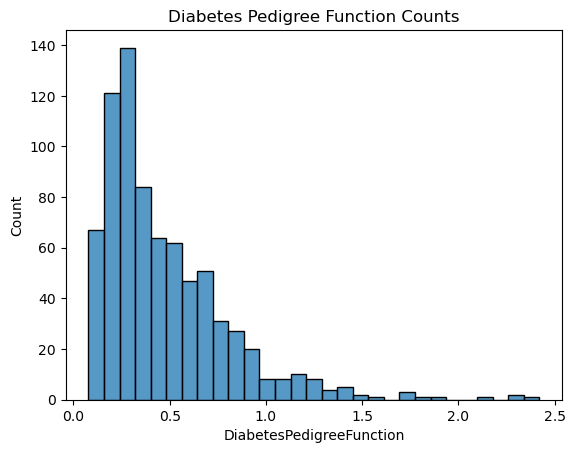

In [5]:
# Checking if this dataset has a large amount of women with a family history of type 2 diabetes with a histogram
# The histogram shows most of the women do not have family history of diabetes which shows this specific dataset is still 
# good to predict diabetes without that family influence.

sns.histplot(x='DiabetesPedigreeFunction', data=diabetes_df)
plt.title('Diabetes Pedigree Function Counts')
plt.show()

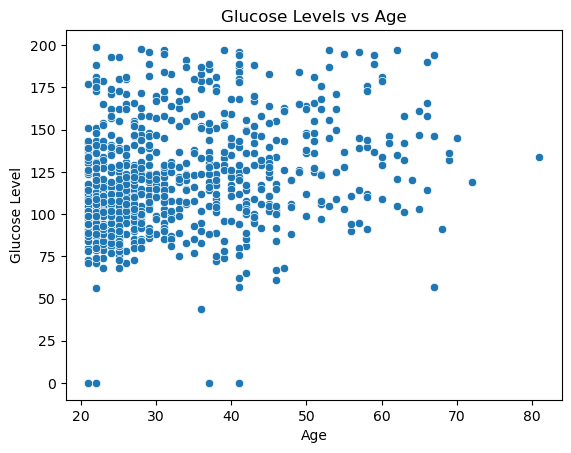

In [6]:
# Seeing if age plays a factor in glucose levels with a scatterplot

sns.scatterplot(x='Age', y='Glucose', data=diabetes_df)
plt.title('Glucose Levels vs Age')
plt.ylabel('Glucose Level')
plt.show()

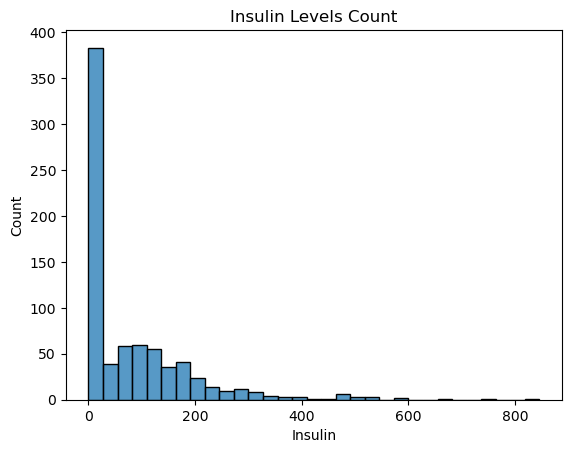

In [7]:
# Checking the insulin levels for the women in the dataset to see whether there are high counts with a histogram

sns.histplot(x='Insulin', data=diabetes_df)
plt.title('Insulin Levels Count')
plt.show()

In [8]:
# Split the data into a training and test set, where the "Outcome" column is the target for my models

# Import libraries
from sklearn.model_selection import train_test_split

x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [14]:
# Run and fit a logistic regression to the training set

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# Import libraries
from sklearn.linear_model import LogisticRegression

# Variable to create the logistic regression model
logisticmodel = LogisticRegression()

# Train logistic regression
logisticmodel.fit(xtrain, ytrain)

LogisticRegression()

In [15]:
# Calculating the results for test data, lm at the end of the variables stands for logistic model
ytestpredlm = logisticmodel.predict(xtest)

# Import library
from sklearn import metrics

# Print the accuracy score for the logistic regression model
metrics.accuracy_score(ytest, ytestpredlm)*100

77.27272727272727

In [16]:
# Import library
from sklearn.metrics import classification_report

# Print the classification report of the metrics
print(classification_report(ytest, ytestpredlm))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       103
           1       0.67      0.63      0.65        51

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [24]:
# Trying a different model to see if there is improvement with the random forest classifier

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Variable to create the random forest model
rforestmodel = RandomForestClassifier()

# Train random forest classifier
rforestmodel.fit(xtrain, ytrain)

RandomForestClassifier()

In [25]:
# Import library
from sklearn import metrics

# Calculating the results for test data for random forest where the end of the variables has rf for random forest
ytestpredrf = rforestmodel.predict(xtest)

metrics.accuracy_score(ytest, ytestpredrf)*100

75.32467532467533

In [47]:
# Printing a classification report of the results

from sklearn.metrics import classification_report

print(classification_report(ytest, ytestpredrf))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.67      0.68        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [48]:
# Creating a correlation matrix of the important features

diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [49]:
# Create a new variable for important features using the random forest classifier model

rforestimportance = rforestmodel.feature_importances_
rforestimportance

array([0.08441096, 0.25138263, 0.09382142, 0.07426099, 0.07654286,
       0.15650509, 0.12388475, 0.13919131])

In [50]:
# Create a variable for important features and the names of the columns

rforestnames = rforestmodel.feature_names_in_
rforestnames

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [51]:
# Create a new dataframe for the important features to plot them as a bar graph

importance_df = pd.DataFrame({"Feature Importances" : rforestimportance, 
                               "Feature Names" : rforestnames})
importance_df

,Feature Importances,Feature Names
0,0.084411,Pregnancies
1,0.251383,Glucose
2,0.093821,BloodPressure
3,0.074261,SkinThickness
4,0.076543,Insulin
5,0.156505,BMI
6,0.123885,DiabetesPedigreeFunction
7,0.139191,Age


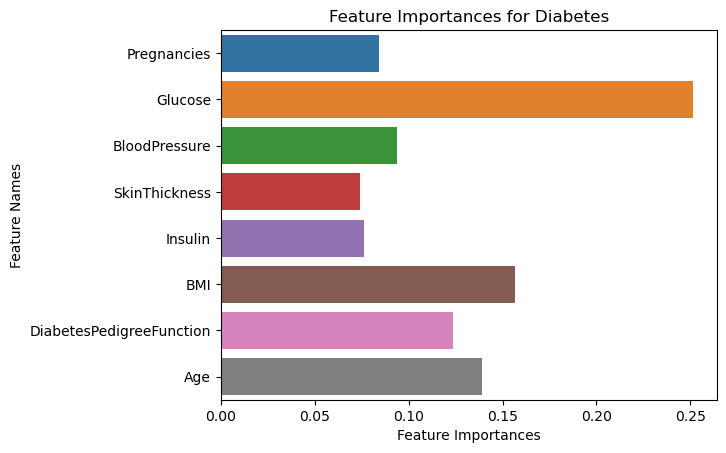

In [52]:
# Plot the important features for the diabetes dataset using a bar chart

sns.barplot(x='Feature Importances', y='Feature Names', data = importance_df)
plt.title('Feature Importances for Diabetes')
plt.show()